<a href="https://colab.research.google.com/github/koroglubeyaz/ML-DeepLearning/blob/main/hw2_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import sys
sys.path.insert(0, 'drive/hw')

In [4]:
!pip install -q keras

In [5]:
import time
from time import process_time

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# import dataset
dataset = tf.keras.datasets.mnist

(train_data, train_labels), (test_data, test_labels) = dataset.load_data()

# formatting and reshaping data
train_data= np.array(train_data, np.float32)
test_data = np.array(test_data, np.float32)

train_data = train_data.reshape([-1, 784])
test_data = test_data.reshape([-1, 784])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
from sklearn.svm import SVC, LinearSVC

# SVM non regularization
svm_non_reg = LinearSVC(dual=False,random_state=0)
svm_non_reg.fit(train_data,train_labels)
pred = svm_non_reg.predict(test_data)

-------------------------------------------------------
The accuracy score:  0.9181
-------------------------------------------------------
----------------Confusion Matrix-----------------------
-------------------------------------------------------


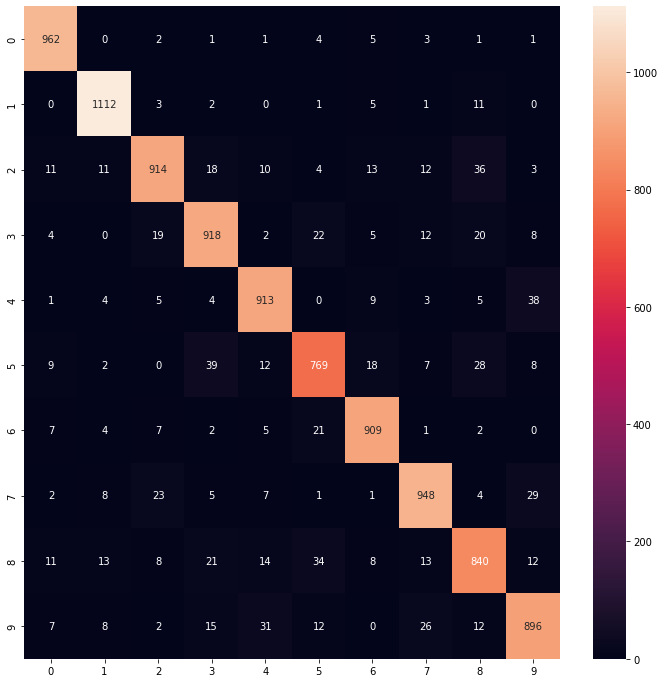

In [10]:
from sklearn.metrics import accuracy_score
import seaborn as sns

print("-------------------------------------------------------")
print("The accuracy score: ", accuracy_score(test_labels,pred))
print("-------------------------------------------------------")
print("----------------Confusion Matrix-----------------------")
print("-------------------------------------------------------")

from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_labels,pred)
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (12, 12))
sns.heatmap(df_cm, annot = True,fmt='g')

In [11]:
# with SGD
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=0.01, loss="hinge")
sgdc.fit(train_data, train_labels)
pred = sgdc.predict(test_data)

-------------------------------------------------------
The accuracy score:  0.912
-------------------------------------------------------
----------------Confusion Matrix-----------------------
-------------------------------------------------------


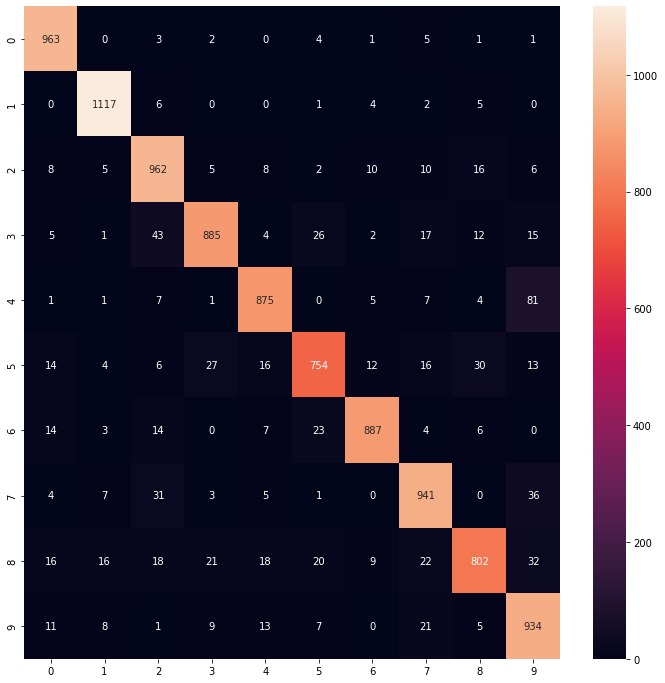

In [12]:
print("-------------------------------------------------------")
print("The accuracy score: ", accuracy_score(test_labels,pred))
print("-------------------------------------------------------")
print("----------------Confusion Matrix-----------------------")
print("-------------------------------------------------------")

from sklearn.metrics import confusion_matrix

array = confusion_matrix(test_labels,pred)
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (12, 12))
sns.heatmap(df_cm, annot = True,fmt='g')